# COGS 118B - Final Project

# Insert title here

# Names

- Yifan Lou
- Jacob Lamadrid
- Brandon Chu
- Anvita Suresh
- Sijia Wen

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

The Central Nervous System (CNS) consists of the brain and spinal cord. It serves as the main processing center for the entire body, playing a part in most biological functions. It regulates conscious thought, as well as unconscious processes such as heart rate, breathing, and blood pressure.<sup id="fn1-ref"><a href="#fn1">1</a></sup>

CNS tumors describe an abnormal growth or mass of cells in the brain or spinal cord. They develop when the DNA in some cells change, giving harmful instructions to divide, leading to a buildup. These tumors can be classified as malignant–or harmful, and benign–or harmless.<sup id="fn2-ref"><a href="#fn2">2</a></sup>

Brain and spinal cord cancer represents a significant public health concern, accounting for nearly 18,760 deaths in 2023.<sup id="fn3-ref"><a href="#fn3">3</a></sup> While only the 16th most common form of cancer<sup id="fn4-ref"><a href="#fn4">4</a></sup>, 40% of metastatic cancer transforms into brain cancer.<sup id="fn5-ref"><a href="#fn5">5</a></sup> This situation is exacerbated in low and middle-income countries (LMICs) where cancer-related mortality is significantly higher–especially in people younger than 65 years of age.<sup id="fn6-ref"><a href="#fn6">6</a></sup> Early detection of cancer has shown to significantly improve the survival rate, as well as drastically reduce treatment costs.<sup id="fn7-ref"><a href="#fn7">7</a></sup> However, it's estimated that 50% of cancers are detected at an advanced stage when diagnosed.<sup id="fn8-ref"><a href="#fn8">8</a></sup>

In the capture of brain tumors, Magnetic Resonance Imaging (MRI) imaging has been shown to be the most effective.<sup id="fn9-ref"><a href="#fn9">9</a></sup> MRI is a medical imaging technique that uses a magnetic field and radio waves to create detailed images of the brain.<sup id="fn10-ref"><a href="#fn10">10</a></sup>

An earlier study conducted on MRI images done in 2008 aimed at classifying metastasis from gliomas and identifying high-grade versus low-grade gliomas achieved relatively high classification scores. The study used SVM with recursive feature elimination.<sup id="fn11-ref"><a href="#fn11">11</a></sup>

A more recent study compared the performances of multiple Machine Learning models and Deep Learning models on the identification of brain tumors. The study found that CNNs–Convolutional Neural Networks was the most effective method compared to Decision Tree, Linear Discrimination, Naive Bayes, Support Vector Machine, K-nearest neighbour, and Ensemble.<sup id="fn12-ref"><a href="#fn12">12</a></sup>

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data


We are planning on using the following dataset by Kaggle:

Brain Tumor MRI Dataset

https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

The dataset has 7022 observations, and because they are in the form of human brain MRI images, there are potentially a huge number of variables and features in each image but we will want to do a PCA and reduce it down to around 10 variables. A single observation in the dataset consists of one human brain MRI image. We would ideally want to single out the variables that are most responsible for separating out different brain conditions so that we can classify the images into 4 classes: glioma - meningioma - no tumor and pituitary. Some variables we may consider as represented in the images are mean pixel values, skewness, kurtosis, features of Grey Level Co-occurrence Matrix (GLCM), mean, variance, energy, entropy, contrast, homogeneity, correlation, prominence and shade. For data cleaning, since the size of the images in this dataset are different, we plan on resizing the image to the desired size after pre-processing and removing the extra margins. We would also test the validity of the extracted features using ANOVA before putting them into classifiers.


In [6]:
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
import seaborn as sns

import modules.utils as utils

import modules.pca as pca

import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items

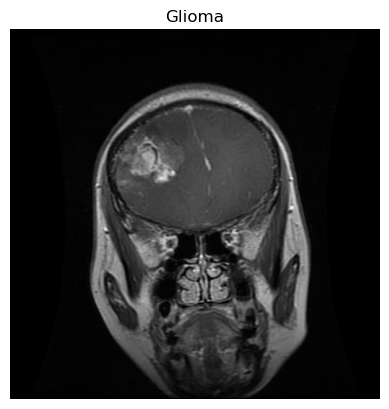

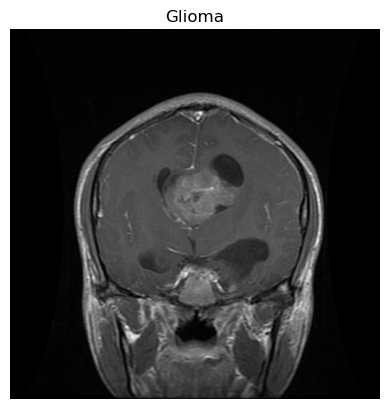

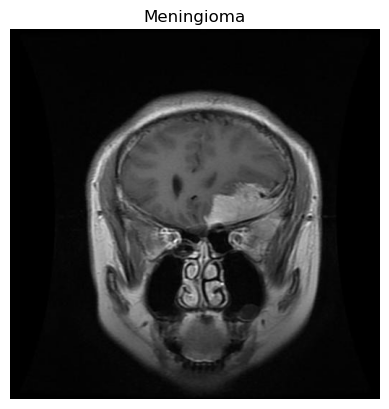

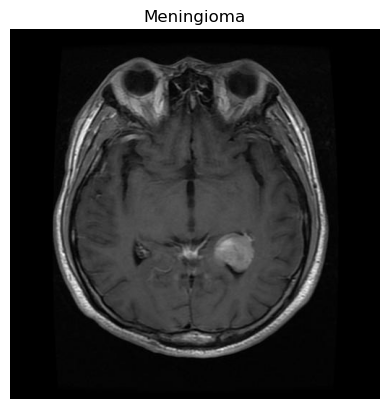

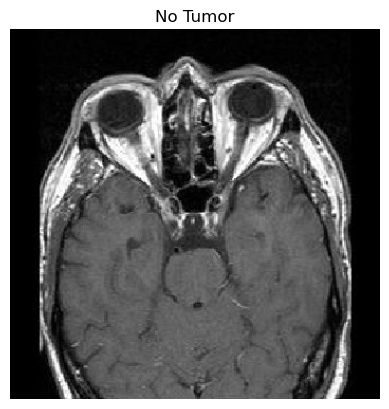

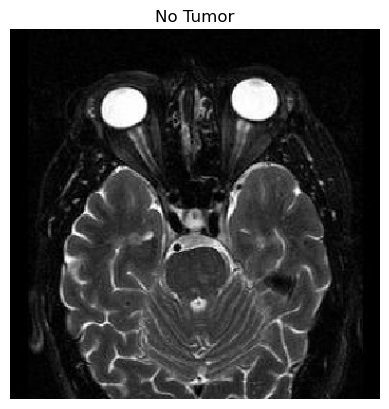

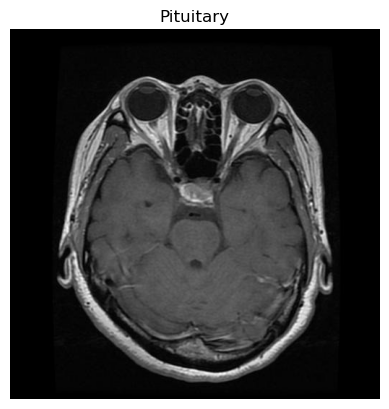

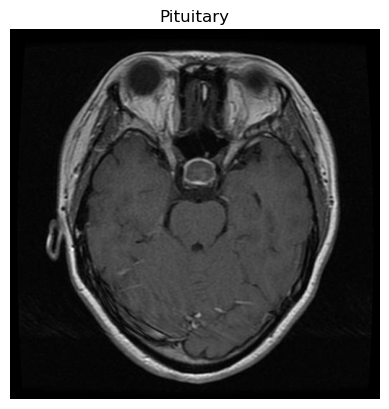

In [ ]:
def view_image(file, tumor_type):
    img = mpimg.imread(file)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.title(tumor_type)
    plt.show()

for file in os.listdir('data/Training/glioma')[:2]:
    view_image('data/Training/glioma/' + file, 'Glioma')

for file in os.listdir('data/Training/meningioma')[:2]:
    view_image('data/Training/meningioma/' + file, 'Meningioma')

for file in os.listdir('data/Training/notumor')[:2]:
    view_image('data/Training/notumor/' + file, 'No Tumor')

for file in os.listdir('data/Training/pituitary')[:2]:
    view_image('data/Training/pituitary/' + file, 'Pituitary')

In [3]:
# train, test = utils.load()

# train.head()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,class
0,-1.9,-1.9,-1.9,-1.900000,-1.900000,-1.900000,-1.900000,-1.892157,-1.892157,-1.892157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,glioma
1,-1.9,-1.9,-1.9,-1.884314,-1.884314,-1.884314,-1.884314,-1.884314,-1.884314,-1.884314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,glioma
2,-1.9,-1.9,-1.9,-1.884314,-1.884314,-1.884314,-1.884314,-1.884314,-1.884314,-1.884314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,glioma
3,-1.9,-1.9,-1.9,-1.884314,-1.884314,-1.884314,-1.884314,-1.884314,-1.884314,-1.884314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,glioma
4,-1.9,-1.9,-1.9,-1.900000,-1.868627,-1.868627,-1.868627,-1.868627,-1.868627,-1.868627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,glioma


In [110]:
# train_cnn, test_cnn = utils.load1()
# train_cnn.head()

,path,label
0,data/Training/glioma/Tr-glTr_0000.jpg,glioma
1,data/Training/glioma/Tr-glTr_0001.jpg,glioma
2,data/Training/glioma/Tr-glTr_0002.jpg,glioma
3,data/Training/glioma/Tr-glTr_0003.jpg,glioma
4,data/Training/glioma/Tr-glTr_0004.jpg,glioma


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Results

In our study, we explored the effectiveness of various machine learning techniques for the classification of brain tumors using Magnetic Resonance Imaging (MRI) data. While convolutional neural networks (CNNs) have shown promise in this domain, we sought to investigate whether other supervised and unsupervised learning models could achieve comparable accuracy. Evaluating a diverse array of techniques, including Principal Component Analysis (PCA), K-means clustering, multilayer perceptrons (MLPs), and random forest/SVM classifiers, we aimed to identify the most effective approach for accurately detecting and classifying brain tumors. Our main focus was to assess the performance of CNNs, which are known for their ability to extract intricate features from image data, against the performance of alternative models. Through comprehensive evaluation and comparison, our goal was to gain a deeper understanding of the strengths and limitations of different models in the context of brain tumor detection and classification.

### Subsection 1: CNN Deep Learning Model

First to start our analysis, we import the required packages for CNN model. 


In [3]:
import numpy as np
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input
from keras.optimizers import Adamax

Now we normalize the images in train_cnn and test_cnn dataset we created above using an ImageDataGenerator for further CNN model analysis. 
(rescaling the pixel values to the range [0, 1])

In [ ]:
batch_size = 32

tr_igen = ImageDataGenerator(rescale=1./255) #normalize
ts_igen = ImageDataGenerator(rescale=1./255)
train_gen = tr_igen.flow_from_dataframe(train_cnn, x_col= 'path', y_col= 'label', class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)


test_gen = ts_igen.flow_from_dataframe(test_cnn, x_col= 'path', y_col= 'label', class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


In [ ]:
#train_gen[1]

In [ ]:
class_count = len(list(train_gen.class_indices.keys()))
class_count

4

Subsequently, we construct the CNN architecture and train the model. The architecture consists of multiple 2D convolutional layers followed by pooling layers to extract features and reduce spatial dimensions. The output is then flattened into a one-dimensional vector and fed into dense layers for feature extraction and classification.

In [ ]:
img_shape = (128, 128, 3)
input_layer = Input(shape=img_shape)

cnn = Sequential([ #cnn structure
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation="relu"),#256 64
    Dense(4, activation="softmax") #4 categories
])

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) 

Now we train the model using the training dataset generated above. 

In [ ]:
history = cnn.fit(train_gen, epochs= 10, verbose= 1, validation_data= test_gen, shuffle= False)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 108s 598ms/step - accuracy: 0.6071 - loss: 1.0727 - val_accuracy: 0.8291 - val_loss: 0.4787
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 93s 517ms/step - accuracy: 0.8839 - loss: 0.3146 - val_accuracy: 0.8825 - val_loss: 0.3032
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 91s 507ms/step - accuracy: 0.9482 - loss: 0.1394 - val_accuracy: 0.9413 - val_loss: 0.1751
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 89s 494ms/step - accuracy: 0.9766 - loss: 0.0677 - val_accuracy: 0.9245 - val_loss: 0.2359
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 87s 485ms/step - accuracy: 0.9892 - loss: 0.0351 - val_accuracy: 0.9375 - val_loss: 0.2940
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 451ms/step - accuracy: 0.9854 - loss: 0.0474 - val_accuracy: 0.9558 - val_loss: 0.1737
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 561ms/step - accuracy: 0.9958 - loss: 0.0128 - val_accuracy: 0.9611 - val_loss: 0.1766
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 547ms/step - accuracy: 0.9971 - loss:

During training, the model achieved an accuracy of approximately 99% on the training set and 96% on the validation set. To assess its performance, we plot both the model's accuracy and loss over the course of training.

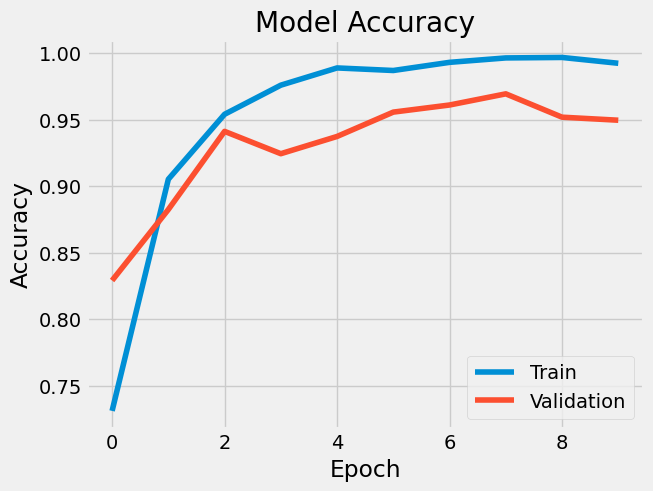

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

From the plot, we see that the training accuracy improves over the course of 10 epochs. However, towards the later epochs, we observe a slight decline in validation accuracy. This phenomenon may indicate overfitting. Despite this slight decrease, the validation accuracy remains relatively high, indicating that the model maintains good performance throughout the training process.

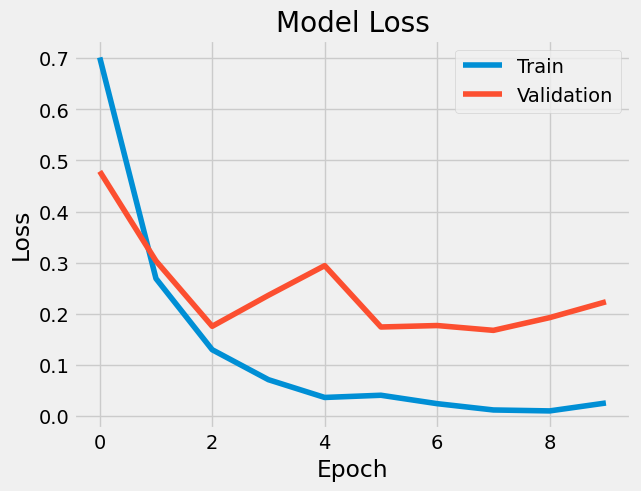

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


Similarly, the loss plot illustrates an exponential decrease in training loss. The validation loss also decreases initially but begins to level off and even increase slightly towards the later epochs. This divergence between training and validation loss suggests that while the model performs well on the training data, it may struggle to generalize to unseen data. These two plots also suggest that epoch 7 might be the optimal point where the model achieves a good balance between minimizing training loss and generalizing to unseen data.

In [ ]:
train_score = cnn.evaluate(train_gen, verbose= 1)
test_score = cnn.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9922 - loss: 0.0245
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.9340 - loss: 0.2987
Train Loss:  0.028149934485554695
Train Accuracy:  0.9912465214729309
Test Loss:  0.2231137603521347
Test Accuracy:  0.9496567249298096


We evaluated the model on the test data, and it reached an accuracy of 94% on the test set. We then applied our model to predict the test dataset. 

In [ ]:
preds = cnn.predict(test_gen)  
y_pred = np.argmax(preds, axis=1) 



41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step


In [ ]:
test_dict = test_gen.class_indices
classes = list(test_dict.keys()) #4 types of tumor

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))


              precision    recall  f1-score   support

      glioma       0.94      0.96      0.95       300
  meningioma       0.95      0.83      0.89       306
     notumor       0.94      1.00      0.97       405
   pituitary       0.96      1.00      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311




From the classification report, we observe high precision and recall values for the glioma, notumor, and pituitary classes, indicating that the model accurately identifies these tumor types with few false positives and false negatives. However, for the meningioma class, while the precision is high, the recall is slightly lower, suggesting that the model may miss some instances of this tumor type. Overall, the model achieved high accuracy, correctly classifying glioma, notumor, and pituitary cases with high precision and recall.

### Subsection 2: PCA for Dimensionality Reduction and Feature Extraction + Wavelet Transforms

The PCA algorithm is a tool for dimensionality reduction and, particularly for this project, a method of feature extraction from image data. In combination with wavelet transforms for increased "visual acuity" of the method, we are able to generate useful feature vectors of basic classification algorithms. This allows for a convolution free solution to a generally computer vision problem, thereby limiting computational complexity for ideally identical results.

Below are 3 visuals representing the explained variance at each number of components, an example of the generated feature space and the correlation of components. The visuals representing the components themselves are intended to visualize the generated data as separable data with clear patterns in the data in terms of which groups are similar and which are more different shown by the distances apart.

The PCA algorithm at 3 components is utilized for these visualizations but for the modeling and classification purposes, 10 components are used as this is near the peak of the explained variance ratio, as it follows a logarithmic curve, while maintaining limited computational complexity.

In [ ]:
# pca_3 = pca.extract(train, test, n_components=3)
# pca_10 = pca.extract(train, test, n_components=10)

In [8]:
features_3_train = pd.read_csv('features/3_features_train.csv')
features_3_test = pd.read_csv('features/3_features_test.csv')

features_10_train = pd.read_csv('features/10_features_train.csv')
features_10_test = pd.read_csv('features/10_features_test.csv')

train_3_X = features_3_train[features_3_train.columns[:-1]]
train_3_y = features_3_train[features_3_train.columns[-1]]

test_3_X = features_3_test[features_3_test.columns[:-1]]
test_3_y = features_3_test[features_3_test.columns[-1]]

train_10_X = features_10_train[features_10_train.columns[:-1]]
train_10_y = features_10_train[features_10_train.columns[-1]]

test_10_X = features_10_test[features_10_test.columns[:-1]]
test_10_y = features_10_test[features_10_test.columns[-1]]

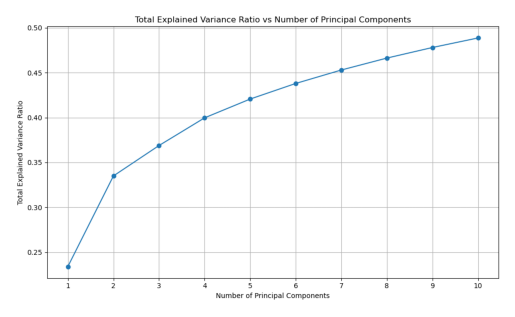

In [4]:
#pca_components = [
#    pca.extract(train_df=train, test_df=test, n_components=i)
#    for i in range(1, 11)
#]
#utils.visualize_evr(pca_components)

img = mpimg.imread('images/evr_plot.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

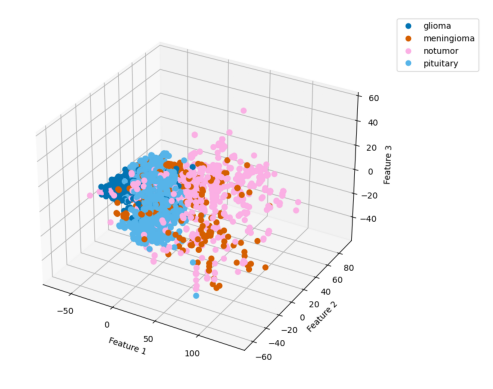

In [5]:
# utils.visualize_points(features_3_train, pca_3)

img = mpimg.imread('images/points_plot.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

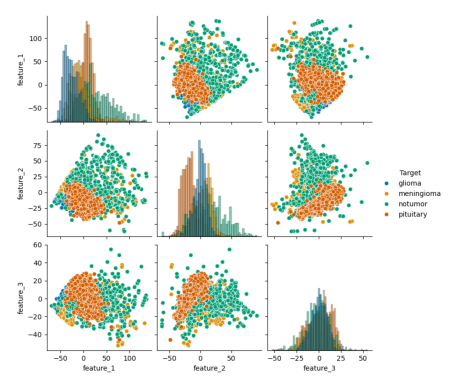

In [6]:
# utils.visualize_features(train_3_X, train_3_y)

img = mpimg.imread('images/feature_plot.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

### Subsection 3: Model Exploration

Our 3 models explored are the MLP, KNN and SVM/Random Forest classifiers. These models were selected for further exploration based on preliminary trials with default parameters. These models performed the best and appeared to be the most suitable given the nature of our data.


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

/Users/yifanlou/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8360030511060259

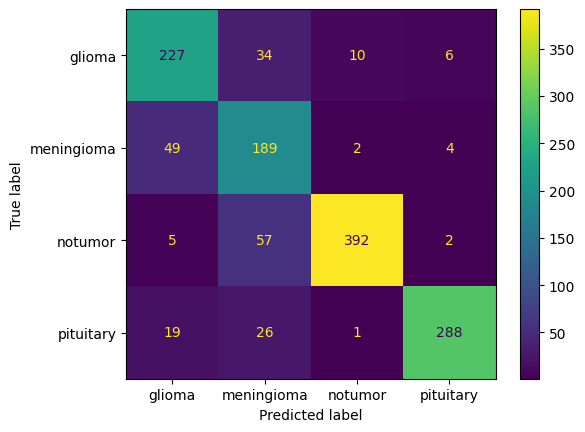

In [5]:
mlp = MLPClassifier()

mlp.fit(train_10_X, train_10_y)

cm = confusion_matrix(mlp.predict(test_10_X), test_10_y, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=mlp.classes_)

disp.plot()

mlp.score(test_10_X, test_10_y)

0.8573607932875668

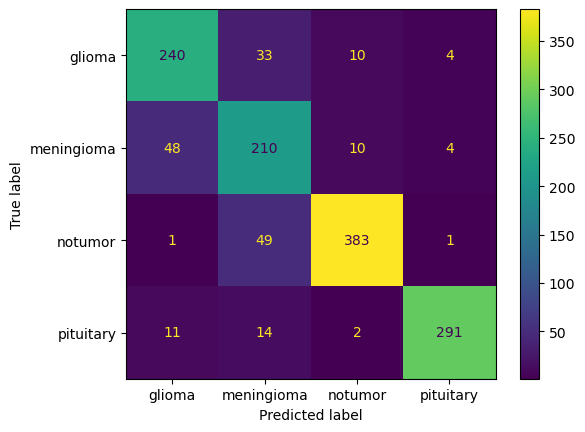

In [13]:
knn = KNeighborsClassifier()

knn.fit(train_10_X, train_10_y)

cm = confusion_matrix(knn.predict(test_10_X), test_10_y, labels=knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)

disp.plot()

knn.score(test_10_X, test_10_y)

In [9]:
svc = SVC(kernel="linear")


rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),   scoring='accuracy', n_jobs=-1)
rfecv.fit(train_10_X, train_10_y)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(rfecv.transform(train_10_X), train_10_y)
X_reduced = rfecv.transform(test_10_X)

cm = confusion_matrix(rf_classifier.predict(X_reduced), test_10_y, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=rf_classifier.classes_)

disp.plot()


rf_classifier.score(X_reduced, test_10_y)


### Subsection 4 Parameter Tuning

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of performance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [(500,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}

mlp = MLPClassifier(max_iter=1000) # max_iter needed for gridsearch section

grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy', verbose=3)

grid_search_mlp.fit(train_10_X, train_10_y)

In [15]:
print("Best parameters for MLPClassifier:", grid_search_mlp.best_params_)

Best parameters for MLPClassifier: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (500,), 'learning_rate': 'constant'}


In [18]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(500,), activation='tanh', alpha=0.0001, learning_rate='constant')
mlp_classifier.fit(train_10_X, train_10_y)
mlp_classifier.score(test_10_X, test_10_y)

0.9382151029748284

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

grid_search_knn.fit(train_10_X, train_10_y)


In [ ]:
print("Best parameters for KNeighborsClassifier:", grid_search_knn.best_params_)
print("Best score for KNeighborsClassifier:", grid_search_knn.best_score_)

Best parameters for KNeighborsClassifier: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
Best score for KNeighborsClassifier: 0.8375346470482782


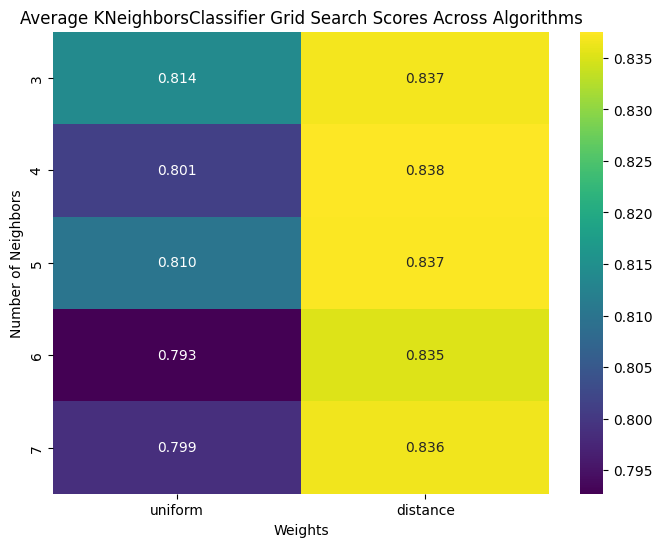

In [ ]:
scores = grid_search_knn.cv_results_['mean_test_score']

n_neighbors = param_grid_knn['n_neighbors']
weights = param_grid_knn['weights']
algorithms = param_grid_knn['algorithm']

scores_matrix = np.zeros((len(n_neighbors), len(weights)))

for i, neighbor in enumerate(n_neighbors):
    for j, weight in enumerate(weights):
        score_subset = [scores[k] for k, param in enumerate(grid_search_knn.cv_results_['params']) if param['n_neighbors'] == neighbor and param['weights'] == weight]
        scores_matrix[i, j] = np.mean(score_subset)

plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap="viridis",
            xticklabels=weights, yticklabels=n_neighbors)
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.title('Average KNeighborsClassifier Grid Search Scores Across Algorithms')
plt.show()

### Subsection 5: Model Evaluation

In the case of our supervised classification methods, we will utilize the recall score of our model due to the implied severity of a false negative in accurately classifying/detecting a brain tumor and its type. A more significant weight must be applied to our model missing a tumor than accidentally identifying a tumor which isn't there as a positive identification will at least warrant a further look rather than a complete discharge of the patient.

$$recall = \frac{TP}{TP + FN}$$

In [19]:
mlp_final = MLPClassifier(hidden_layer_sizes=(500,), activation='tanh', solver='adam', alpha=0.0001, learning_rate='constant', max_iter=1000)
knn_final = KNeighborsClassifier(algorithm='auto', n_neighbors=4, weights='distance')

mlp_final.fit(train_10_X, train_10_y)
knn_final.fit(train_10_X, train_10_y)

mlp_recall = recall_score(mlp_final.predict(test_10_X), test_10_y, average='micro')
knn_recall = recall_score(knn_final.predict(test_10_X), test_10_y, average='micro')

print('MLPClassifier Recall Score: ' + str(mlp_recall))
print('KNeighborsClassifier Recall Score: ' + str(knn_recall))

MLPClassifier Recall Score: 0.9427917620137299
KNeighborsClassifier Recall Score: 0.931350114416476


# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

In the context of our project using the Brain Tumor MRI dataset, there are several ethical considerations to address. Since our dataset is a combination of three data sources (figshare site, SARTAJ dataset, and Br35H dataset), it's essential to ensure ethical use and interpretation of the data.

One ethical concern arises from the potential misclassification of glioma class images in the SARTAJ dataset. This issue was identified through observations from the creators of the dataset and the findings of others. To address this concern, we made the decision to exclude the glioma class images from the SARTAJ dataset and instead utilized images from the figshare site.

Additionally, while the dataset is publicly available online and may not directly involve individual privacy concerns, we will still ensure anonymity of the identities of individuals represented in the images and remove any that cause data leakage. 

To mitigate potential biases, we will carefully examine the data sources and all available images across different classes to ensure representativeness and fairness in our findings. Our aim is to ensure that the dataset remains unbiased and does not target any specific group based on characteristics such as sex, age, or ethnicity.

Lastly, in our analysis, we will ensure transparency at every step, clearly documenting our methodology. Also, we will acknowledge potential limitations and actively address any biases in our model selection process.


### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes


<sup id="fn1">1</sup>: “Brain Basics: Know Your Brain.” National Institute of Neurological Disorders and Stroke. <a href="https://www.ninds.nih.gov/health-information/public-education/brain-basics/brain-basics-know-your-brain">https://www.ninds.nih.gov/health-information/public-education/brain-basics/brain-basics-know-your-brain</a>.

<sup id="fn2">2</sup>: “Brain Tumor: Symptoms, Signs & Causes.” Cleveland Clinic. <a href="https://my.clevelandclinic.org/health/diseases/6149-brain-cancer-brain-tumor">https://my.clevelandclinic.org/health/diseases/6149-brain-cancer-brain-tumor</a>.

<sup id="fn3">3</sup>: “Key Statistics for Brain and Spinal Cord Tumors.” American Cancer Society. <a href="https://www.cancer.org/cancer/types/brain-spinal-cord-tumors-adults/about/key-statistics.html">https://www.cancer.org/cancer/types/brain-spinal-cord-tumors-adults/about/key-statistics.html</a>.

<sup id="fn4">4</sup>: “Cancer of the Brain and Other Nervous System - Cancer Stat Facts.” SEER. <a href="https://seer.cancer.gov/statfacts/html/brain.html">https://seer.cancer.gov/statfacts/html/brain.html</a>.

<sup id="fn5">5</sup>: Tabouret, Emeline, Olivier Chinot, Philippe Metellus, Agnès Tallet, Patrice Viens, and Anthony Gonçalves. “Recent Trends in Epidemiology of Brain Metastases: An Overview.” Anticancer research, November 2012. <a href="https://www.ncbi.nlm.nih.gov/pubmed/23155227">https://www.ncbi.nlm.nih.gov/pubmed/23155227</a>.

<sup id="fn6">6</sup>: "Cancer control in low- and middle-income countries: Is it time..." <a href="https://ascopubs.org/doi/10.1200/JGO.18.00200">https://ascopubs.org/doi/10.1200/JGO.18.00200</a>.

<sup id="fn7">7</sup>: Birtwistle, Mike. “Saving Lives and Averting Costs? The Case for Earlier Diagnosis Just Got Stronger.” Cancer Research UK - Cancer News, April 12, 2021. <a href="https://news.cancerresearchuk.org/2014/09/22/saving-lives-and-averting-costs-the-case-for-earlier-diagnosis-just-got-stronger/">https://news.cancerresearchuk.org/2014/09/22/saving-lives-and-averting-costs-the-case-for-earlier-diagnosis-just-got-stronger/</a>.

<sup id="fn8">8</sup>: Crosby D, Bhatia S, Brindle KM, Coussens LM, Dive C, Emberton M, Esener S, Fitzgerald RC, Gambhir SS, Kuhn P, Rebbeck TR, Balasubramanian S. “Early Detection of Cancer.” Science (New York, N.Y.). Accessed February 20, 2024. <a href="https://pubmed.ncbi.nlm.nih.gov/35298272/">https://pubmed.ncbi.nlm.nih.gov/35298272/</a>.

<sup id="fn9">9</sup>: Ytre‐Hauge, Sigmund, Julie A. Dybvik, Arvid Lundervold, Øyvind O. Salvesen, Camilla Krakstad, Kristine E. Fasmer, Henrica M. Werner, et al. “Preoperative Tumor Texture Analysis on MRI Predicts High‐risk Disease and Reduced Survival in Endometrial Cancer.” Journal of Magnetic Resonance Imaging 48, no. 6 (August 13, 2018): 1637–47. <a href="https://doi.org/10.1002/jmri.26184">https://doi.org/10.1002/jmri.26184</a>.

<sup id="fn10">10</sup>: "MRI." Mayo Clinic. <a href="https://www.mayoclinic.org/tests-procedures/mri/about/pac-20384768">https://www.mayoclinic.org/tests-procedures/mri/about/pac-20384768</a>.

<sup id="fn11">11</sup>: Zacharaki, Evangelia I., Sumei Wang, Sanjeev Chawla, Dong Soo Yoo, Ronald Wolf, Elias R. Melhem, and Christos Davatzikos. “Classification of Brain Tumor Type and Grade Using MRI Texture and Shape in a Machine Learning Scheme.” Magnetic Resonance in Medicine 62, no. 6 (October 26, 2009): 1609–18. <a href="https://doi.org/10.1002/mrm.22147">https://doi.org/10.1002/mrm.22147</a>.

<sup id="fn12">12</sup>: Tandel, Gopal S., Antonella Balestrieri, Tanay Jujaray, Narender N. Khanna, Luca Saba, and Jasjit S. Suri. “Multiclass Magnetic Resonance Imaging Brain Tumor Classification Using Artificial Intelligence Paradigm.” Computers in Biology and Medicine 122 (July 2020): 103804. <a href="https://doi.org/10.1016/j.compbiomed.2020.103804">https://doi.org/10.1016/j.compbiomed.2020.103804</a>.